In [109]:
import quandl
quandl.ApiConfig.api_key = 'GtXJkxVRMe7y4rxErxN-'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [101]:
#Pull Data from Quandl
quote = quandl.get("BCHARTS/OKCOINUSD")

In [102]:
quote = quote.loc['2018-01-01':'2018-12-31'] #set time range
weekdays = cycle(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) #create cylce object of weekdays
quote['Weekday'] = [next(weekdays) for x in range (len(quote))] #create weekday column
quote.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Weekday
Date,,,,,,,,
2018-01-01,14786.05,14786.05,13900.00,14599.98,145.1012,2.081415e+06,14344.574222,Monday
2018-01-02,14599.88,16125.49,13900.00,15615.54,195.6860,2.893858e+06,14788.271441,Tuesday
2018-01-03,15482.37,16289.02,15188.34,16000.00,291.5779,4.545389e+06,15588.934924,Wednesday
2018-01-04,15921.83,16188.00,14877.09,15942.44,172.0476,2.676590e+06,15557.267287,Thursday
2018-01-05,15983.93,18332.97,15493.18,18187.99,171.8389,2.897983e+06,16864.534182,Friday


In [103]:
#create column for calculated change in value
quote['Change'] = quote['Close'] - quote['Open']
quote['Up/Down'] = quote['Change'] > 0
quote.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,Weekday,Change,Up/Down
Date,,,,,,,,,,
2018-01-01,14786.05,14786.05,13900.00,14599.98,145.1012,2.081415e+06,14344.574222,Monday,-186.07,False
2018-01-02,14599.88,16125.49,13900.00,15615.54,195.6860,2.893858e+06,14788.271441,Tuesday,1015.66,True
2018-01-03,15482.37,16289.02,15188.34,16000.00,291.5779,4.545389e+06,15588.934924,Wednesday,517.63,True
2018-01-04,15921.83,16188.00,14877.09,15942.44,172.0476,2.676590e+06,15557.267287,Thursday,20.61,True
2018-01-05,15983.93,18332.97,15493.18,18187.99,171.8389,2.897983e+06,16864.534182,Friday,2204.06,True


In [104]:
#make groups to sort by day of the week
grouped_day = quote.groupby('Weekday')

In [153]:
#get counts for each day of the week
#sunday
sunday_count = grouped_day.get_group('Sunday')
sunday_count = (sunday_count[sunday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Sunday']['Open'].count())*100
#Monday
monday_count = grouped_day.get_group('Monday')
monday_count = (monday_count[monday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Monday']['Open'].count())*100
#Tuesday
tuesday_count = grouped_day.get_group('Tuesday')
tuesday_count = (tuesday_count[tuesday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Tuesday']['Open'].count())*100
#Wednesday
wednesday_count = grouped_day.get_group('Wednesday')
wednesday_count = (wednesday_count[wednesday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Wednesday']['Open'].count())*100
#Thursday
thursday_count = grouped_day.get_group('Thursday')
thursday_count = (thursday_count[thursday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Thursday']['Open'].count())*100
#Friday
friday_count = grouped_day.get_group('Friday')
friday_count = (friday_count[friday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Friday']['Open'].count())*100
#Saturday
saturday_count = grouped_day.get_group('Saturday')
saturday_count = (saturday_count[saturday_count['Up/Down'] == True]['Open'].count()) / (quote[quote['Weekday'] == 'Saturday']['Open'].count())*100



In [143]:
#Create new dataframe with count of each day
counts = {'Day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], 'Count': [sunday_count,monday_count,tuesday_count,wednesday_count,thursday_count,friday_count,saturday_count]}
counts = pd.DataFrame(data=(counts), index=counts['Day'])
counts

,Day,Count
Sunday,Sunday,51.923077
Monday,Monday,41.509434
Tuesday,Tuesday,44.230769
Wednesday,Wednesday,48.076923
Thursday,Thursday,42.307692
Friday,Friday,38.461538
Saturday,Saturday,59.615385


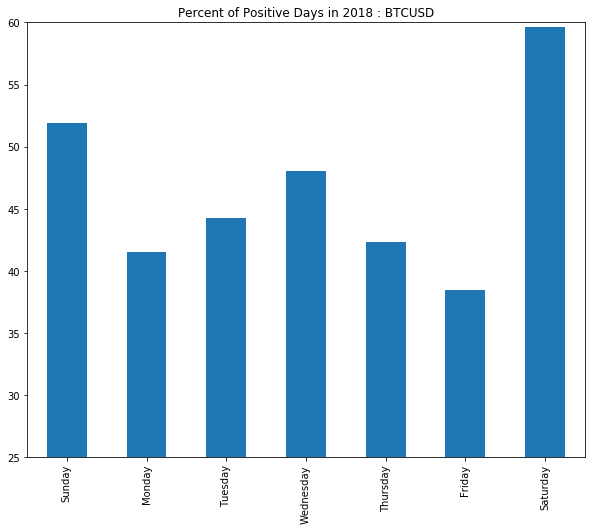

In [159]:
ax = counts.plot.bar(figsize=(10,8), ylim=(25,60), legend=False, title="Percent of Positive Days in 2018 : BTCUSD")